In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import mglearn

In [3]:
train_data = pd.read_csv('WikiLarge_Train.csv')
test_data = pd.read_csv('WikiLarge_Test.csv')


## TFID VECTORIZATION

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
y_train=train_data["label"]
X_test = test_data["original_text"]
X_train=train_data["original_text"]
y_test=test_data["label"]
vectorizer= TfidfVectorizer(min_df=3,max_features=None, strip_accents='unicode', analyzer='word',ngram_range=(1, 3),stop_words = 'english')
vectorizer.fit(X_train)
X_train =  vectorizer.transform(X_train)
X_test = vectorizer.transform(test_data["original_text"])
feature_names = np.array(vectorizer.get_feature_names())

In [5]:
feature_names[0]

'00'

## Baseline models for text features

# Dummy classifier 

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................strategy=most_frequent; total time=   0.1s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ...................................strategy=uniform; total time=   0.0s
[CV] END ...

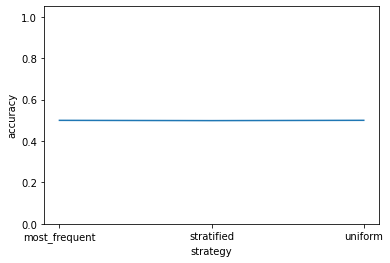

0.500 for {'strategy': 'most_frequent'}
0.499 for {'strategy': 'stratified'}
0.500 for {'strategy': 'uniform'}
nan for {'strategy': 'constant'}

 For the model with the best accuracy


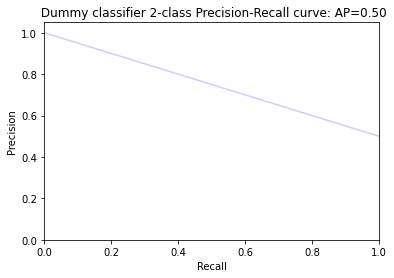

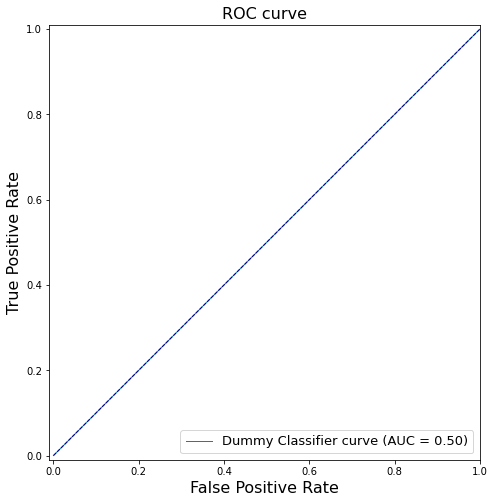

In [6]:
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
score = 'accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {"strategy":['most_frequent', 'stratified', 'uniform', 'constant']}
dummy_grid = GridSearchCV(DummyClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
dummy_grid.fit(X_train, y_train)
toc = time()
dummy_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(dummy_grid.best_params_)
means = dummy_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot(['most_frequent', 'stratified', 'uniform', 'constant'],means)
ax.set_xlabel('strategy')
ax.set_ylabel(score)
ax.set_ylim([0.0, 1.05])
plt.show()
for mean,params in zip(means,dummy_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = dummy_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Dummy classifier 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Dummy Classifier',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Tuning hyper-parameters for recall
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .............................strategy=most_frequent; total time=   0.1s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END .............................strategy=most_frequent; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ................................strategy=stratified; total time=   0.0s
[CV] END ...................................strategy=uniform; total time=   0.0s
[CV] END .....

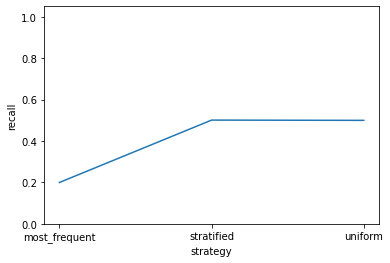

0.200 for {'strategy': 'most_frequent'}
0.501 for {'strategy': 'stratified'}
0.500 for {'strategy': 'uniform'}
nan for {'strategy': 'constant'}

 For the model with the best recall


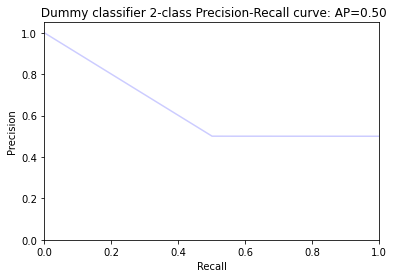

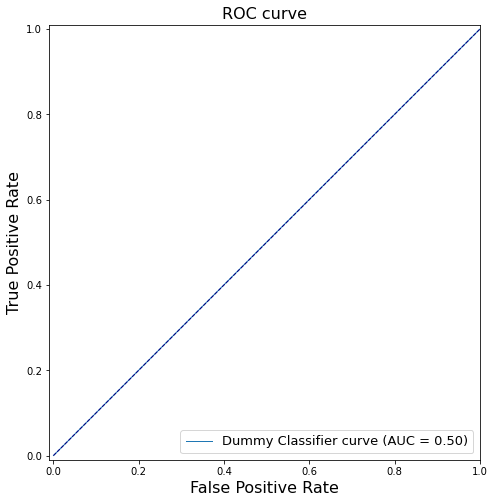

In [7]:
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
score = 'recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {"strategy":['most_frequent', 'stratified', 'uniform', 'constant']}
dummy_grid = GridSearchCV(DummyClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
dummy_grid.fit(X_train, y_train)
toc = time()
dummy_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(dummy_grid.best_params_)
means = dummy_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot(['most_frequent', 'stratified', 'uniform', 'constant'],means)
ax.set_xlabel('strategy')
ax.set_ylabel(score)
ax.set_ylim([0.0, 1.05])
plt.show()
for mean,params in zip(means,dummy_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = dummy_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Dummy classifier 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Dummy Classifier',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

# Logistic regression

Tuning hyper-parameters for recall
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   3.6s
[CV] END ............................................C=0.001; total time=   3.1s
[CV] END ............................................C=0.001; total time=   3.2s
[CV] END ............................................C=0.001; total time=   2.8s
[CV] END ............................................C=0.001; total time=   3.0s
[CV] END .............................................C=0.01; total time=   3.8s
[CV] END .............................................C=0.01; total time=   3.7s
[CV] END .............................................C=0.01; total time=   3.7s
[CV] END .............................................C=0.01; total time=   4.0s
[CV] END .............................................C=0.01; total time=   3.7s
[CV] END ..............................................C=0.1; total time=   6.3s
[CV] END .....

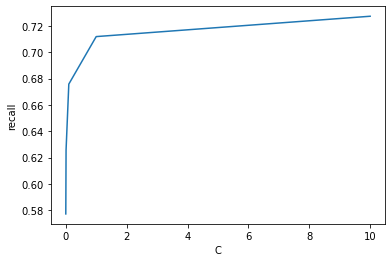

0.577 for {'C': 0.001}
0.626 for {'C': 0.01}
0.676 for {'C': 0.1}
0.712 for {'C': 1}
0.727 for {'C': 10}

 For the model with the best recall


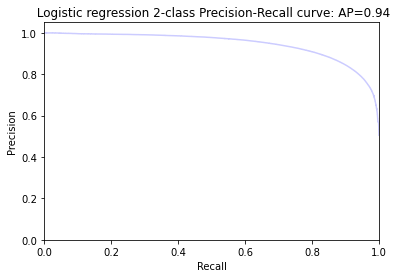

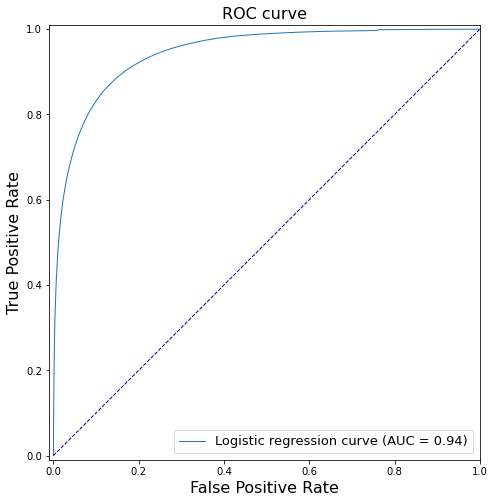

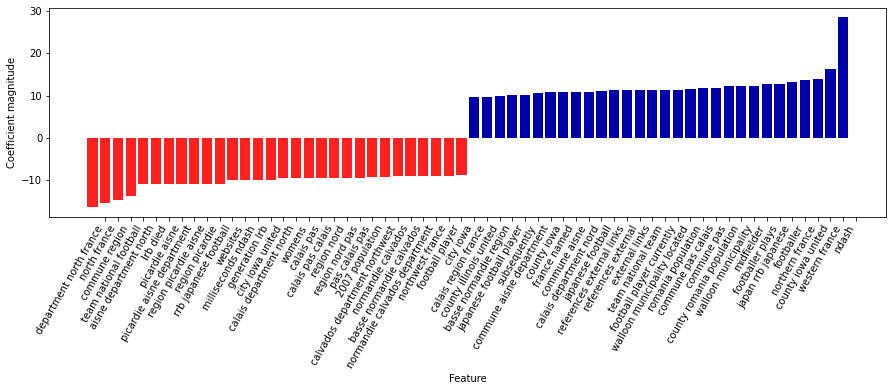

In [12]:
score = 'recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
log_grid.fit(X_train, y_train)
toc = time()
log_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(log_grid.best_params_)
means = log_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,log_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = log_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
mglearn.tools.visualize_coefficients(log_grid.best_estimator_.coef_,feature_names, n_top_features=30)
# predictions=log_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/Logistic_regression_numerical_features_only_tfid_vectoriser",index=False)

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   2.1s
[CV] END ............................................C=0.001; total time=   2.1s
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END ............................................C=0.001; total time=   1.8s
[CV] END .............................................C=0.01; total time=   2.4s
[CV] END .............................................C=0.01; total time=   2.3s
[CV] END .............................................C=0.01; total time=   2.2s
[CV] END .............................................C=0.01; total time=   2.3s
[CV] END .............................................C=0.01; total time=   2.4s
[CV] END ..............................................C=0.1; total time=   4.0s
[CV] END ...

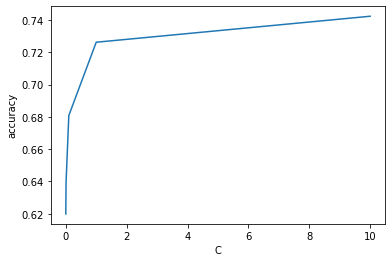

0.620 for {'C': 0.001}
0.639 for {'C': 0.01}
0.681 for {'C': 0.1}
0.726 for {'C': 1}
0.742 for {'C': 10}

 For the model with the best accuracy


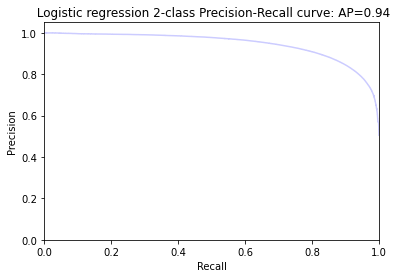

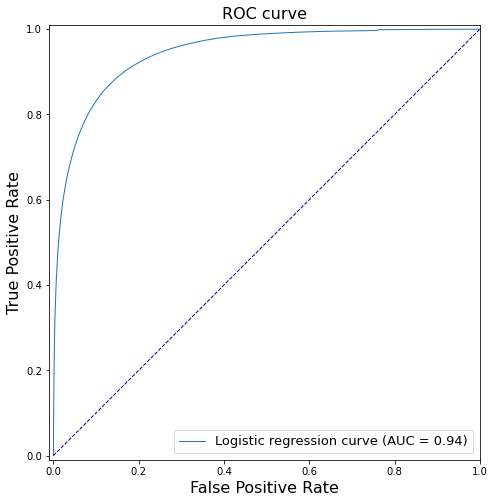

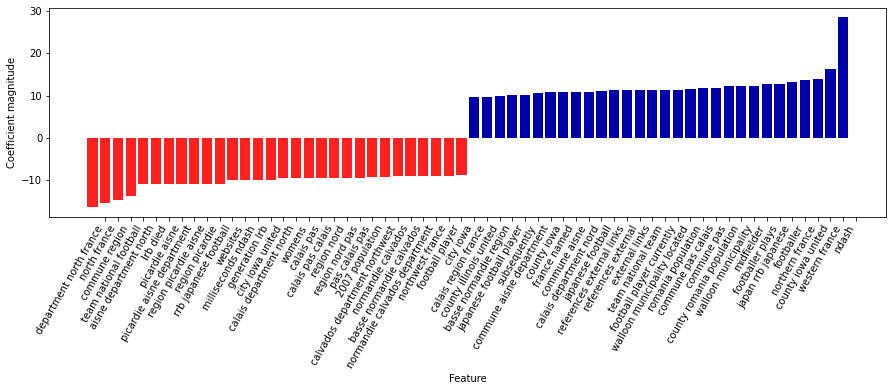

In [14]:
score = 'accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
tic = time()
log_grid.fit(X_train, y_train)
toc = time()
log_time=toc - tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(log_grid.best_params_)
means = log_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,log_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = log_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
mglearn.tools.visualize_coefficients(log_grid.best_estimator_.coef_,feature_names, n_top_features=30)
predictions=log_grid.best_estimator_.predict(X_test)
list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
df.to_csv("baseline_submissions/text_features_only_tfid_vectoriser",index=False)

# Random forest classifier

Tuning hyper-parameters for recall
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.5s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=20; total time=   1.5s
[CV] END ..m

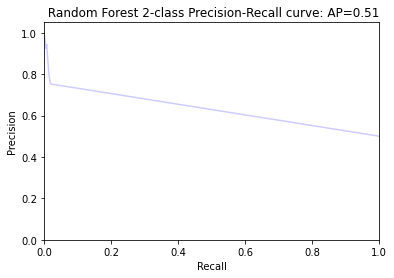

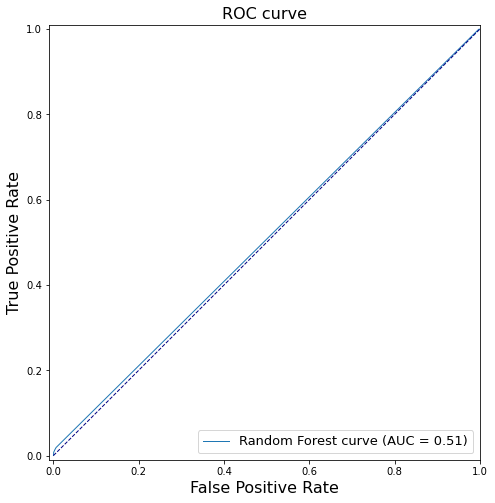

<AxesSubplot:>

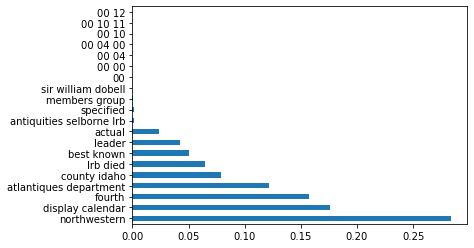

In [22]:
score ='recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'max_depth': [2,3,5],'min_samples_split': [2,5,10],"n_estimators":[5,10,20]}
tic = time()
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
rf_grid.fit(X_train, y_train)
toc = time()
rf_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(rf_grid.best_params_)
means = rf_grid.cv_results_['mean_test_score']
for mean,params in zip(means,rf_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = rf_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Random Forest 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Random Forest',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
print("\n")
# predictions=rf_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/RandomForestClassifier_numerical_features_only_tfid_vectoriser",index=False)
pd.Series(rf_grid.best_estimator_.feature_importances_, index=feature_names).nlargest(20).plot(kind='barh')



Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.6s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.5s
[CV] END ...max_depth=2, min_samples_split=2, n_estimators=5; total time=   0.4s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=10; total time=   0.8s
[CV] END ..max_depth=2, min_samples_split=2, n_estimators=20; total time=   1.4s
[CV] END .

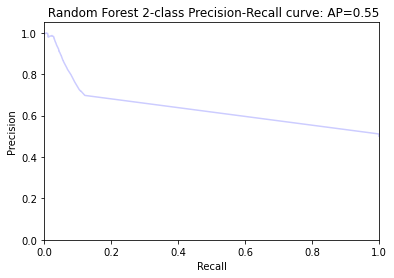

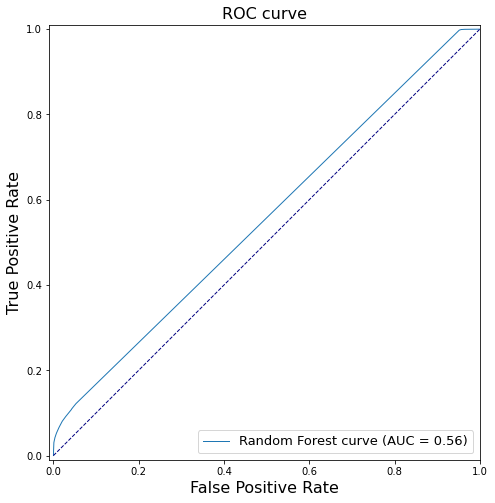

<AxesSubplot:>

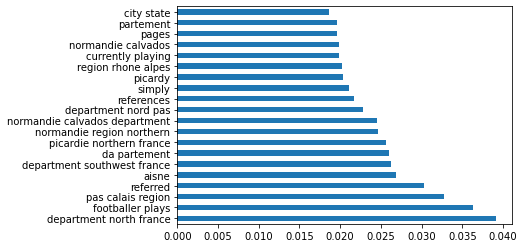

In [23]:
score ='accuracy'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'max_depth': [2,3,5],'min_samples_split': [2,5,10],"n_estimators":[5,10,20]}
tic = time()
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5,verbose=2,scoring=score) 
rf_grid.fit(X_train, y_train)
toc = time()
rf_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(rf_grid.best_params_)
means = rf_grid.cv_results_['mean_test_score']
for mean,params in zip(means,rf_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = rf_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Random Forest 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Random Forest',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
print("\n")

pd.Series(rf_grid.best_estimator_.feature_importances_, index=feature_names).nlargest(20).plot(kind='barh')
# predictions=rf_grid.best_estimator_.predict(X_test)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/RandomForestClassifier_numerical_features_only_tfid_vectoriser",index=False)

## SVM

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................................C=0.001; total time=   0.7s
[CV 2/5] END ........................................C=0.001; total time=   0.6s
[CV 3/5] END ........................................C=0.001; total time=   0.6s
[CV 4/5] END ........................................C=0.001; total time=   0.6s
[CV 5/5] END ........................................C=0.001; total time=   0.7s
[CV 1/5] END .........................................C=0.01; total time=   1.0s
[CV 2/5] END .........................................C=0.01; total time=   1.2s
[CV 3/5] END .........................................C=0.01; total time=   1.2s
[CV 4/5] END .........................................C=0.01; total time=   1.1s
[CV 5/5] END .........................................C=0.01; total time=   1.2s
[CV 1/5] END ..........................................C=0.1; total time=   2.7s
[CV 2/5] END

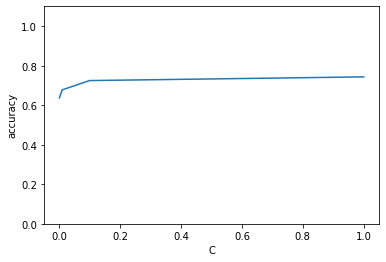

0.637 for {'C': 0.001}
0.677 for {'C': 0.01}
0.725 for {'C': 0.1}
0.743 for {'C': 1}

 For the model with the best accuracy


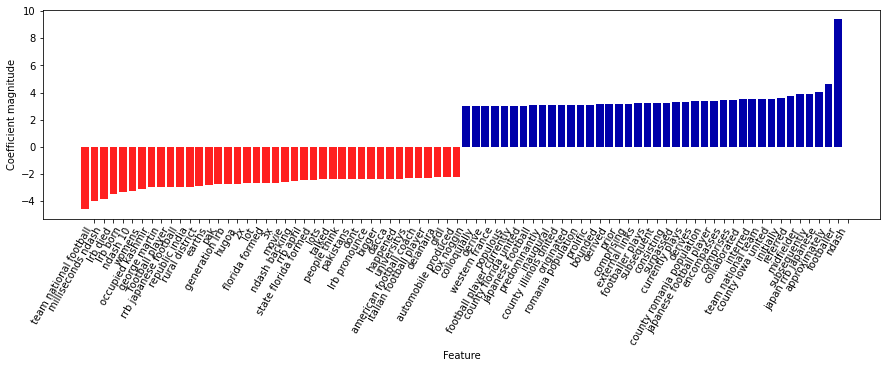

In [7]:
from sklearn.svm import SVC,LinearSVC
score = "accuracy"

print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001,0.01,0.1,1]}
tic = time()
svm_grid = GridSearchCV(LinearSVC(penalty="l2",dual=False), param_grid, refit = True, verbose = 3,scoring=score)
# fitting the model for grid search
svm_grid.fit(X_train, y_train)
toc = time()
svm_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(svm_grid.best_params_)
means = svm_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001,0.01,0.1,1],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
ax.set_ylim([0,1.1])
plt.show()
for mean,params in zip(means,svm_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)
mglearn.tools.visualize_coefficients(svm_grid.best_estimator_.coef_,feature_names, n_top_features=40)

predictions=svm_grid.best_estimator_.predict(X_test)
list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
df.to_csv("baseline_submissions/SVM TEXT features_only_tfid_vectoriser",index=False)

Tuning hyper-parameters for recall
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................................C=0.001; total time=   0.7s
[CV 2/5] END ........................................C=0.001; total time=   0.7s
[CV 3/5] END ........................................C=0.001; total time=   0.7s
[CV 4/5] END ........................................C=0.001; total time=   0.6s
[CV 5/5] END ........................................C=0.001; total time=   0.6s
[CV 1/5] END .........................................C=0.01; total time=   1.0s
[CV 2/5] END .........................................C=0.01; total time=   1.2s
[CV 3/5] END .........................................C=0.01; total time=   1.1s
[CV 4/5] END .........................................C=0.01; total time=   1.1s
[CV 5/5] END .........................................C=0.01; total time=   1.1s
[CV 1/5] END ..........................................C=0.1; total time=   2.8s
[CV 2/5] END .

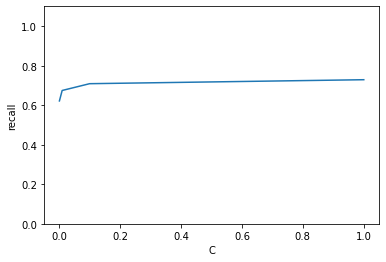

0.622 for {'C': 0.001}
0.674 for {'C': 0.01}
0.709 for {'C': 0.1}
0.729 for {'C': 1}

 For the model with the best recall


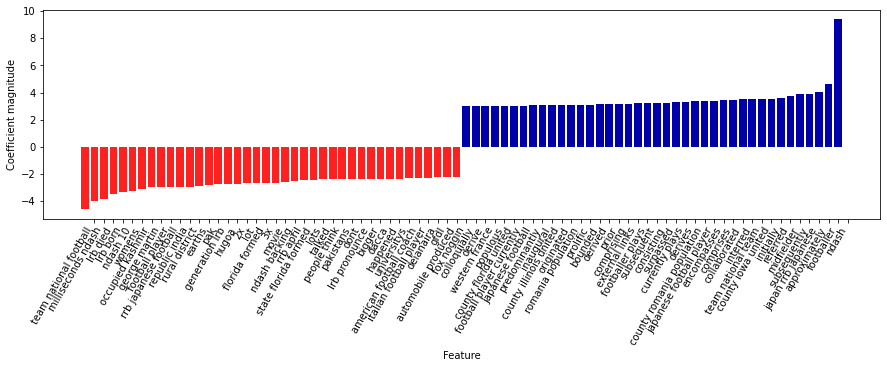

In [25]:
from sklearn.svm import SVC,LinearSVC
score ='recall'
print("Tuning hyper-parameters for %s" % score)
param_grid = {'C': [0.001,0.01,0.1,1]}
tic = time()
svm_grid = GridSearchCV(LinearSVC(penalty="l2",dual=False), param_grid, refit = True, verbose = 3,scoring=score)
# fitting the model for grid search
svm_grid.fit(X_train, y_train)
toc = time()
svm_time=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(svm_grid.best_params_)
means = svm_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001,0.01,0.1,1],means)
ax.set_xlabel('C')
ax.set_ylabel(score)
ax.set_ylim([0,1.1])
plt.show()
for mean,params in zip(means,svm_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)
mglearn.tools.visualize_coefficients(svm_grid.best_estimator_.coef_,feature_names, n_top_features=40)

# Multinomial naive bayes 

Tuning hyper-parameters for recall
Done in 3.000s
Best parameters set found on training data:

{'alpha': 10}
Grid scores on training data:



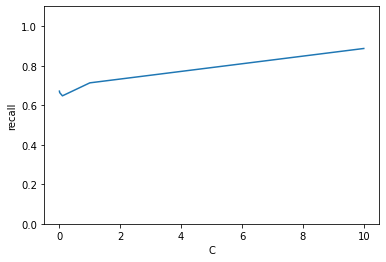

0.671 for {'alpha': 0.001}
0.664 for {'alpha': 0.01}
0.647 for {'alpha': 0.1}
0.713 for {'alpha': 1}
0.887 for {'alpha': 10}

 For the model with the best recall


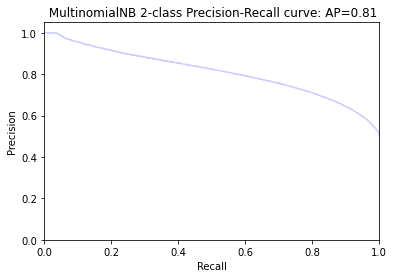

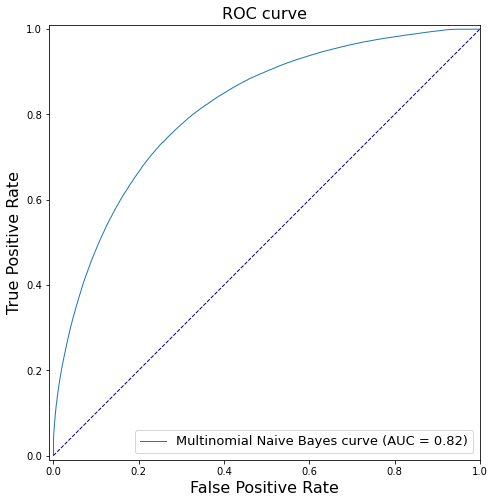

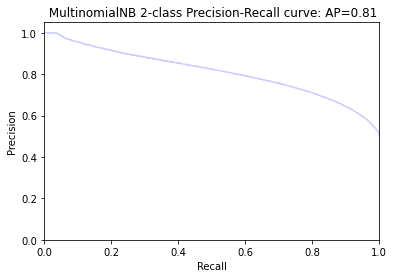

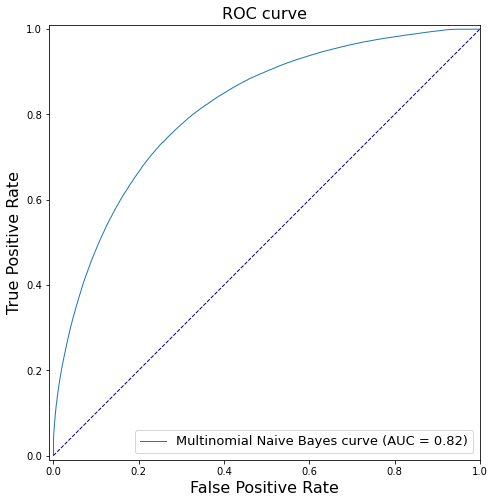

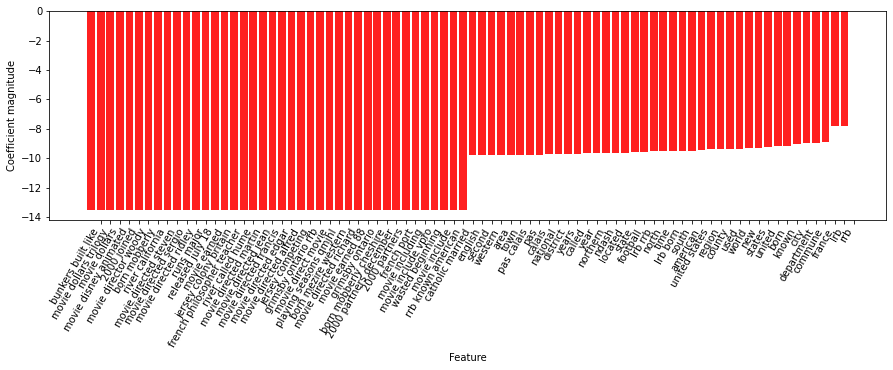

In [26]:
score = 'recall'

print("Tuning hyper-parameters for %s" % score)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
mnb_grid = GridSearchCV(MultinomialNB(), param_grid, cv=5,scoring=score) 
tic = time()
mnb_grid.fit(X_train, y_train)
toc = time()
mnbtime=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(mnb_grid.best_params_)
print("Grid scores on training data:\n")
means = mnb_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylim([0,1.1])
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,mnb_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)

y_score = mnb_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' MultinomialNB 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Multinomial Naive Bayes',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
# predictions=mnb_grid.best_estimator_.predict(X_test_minmax)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/MultinomialNB_text_features_only_tfid_vectoriser",index=False)

y_score = mnb_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' MultinomialNB 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Multinomial Naive Bayes',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


mglearn.tools.visualize_coefficients(mnb_grid.best_estimator_.coef_,feature_names, n_top_features=40)



Tuning hyper-parameters for accuracy
Done in 2.844s
Best parameters set found on training data:

{'alpha': 1}
Grid scores on training data:



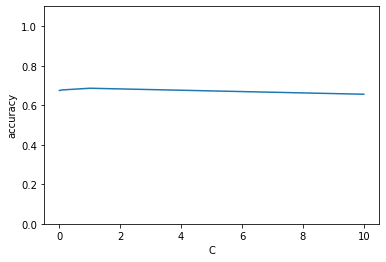

0.674 for {'alpha': 0.001}
0.675 for {'alpha': 0.01}
0.677 for {'alpha': 0.1}
0.686 for {'alpha': 1}
0.655 for {'alpha': 10}

 For the model with the best accuracy


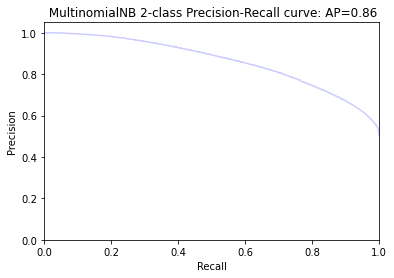

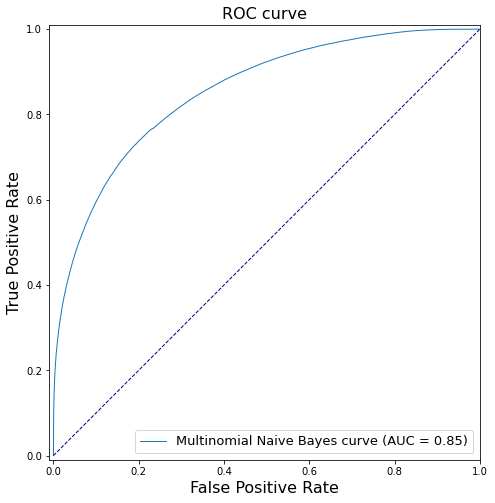

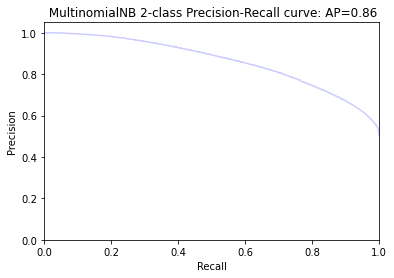

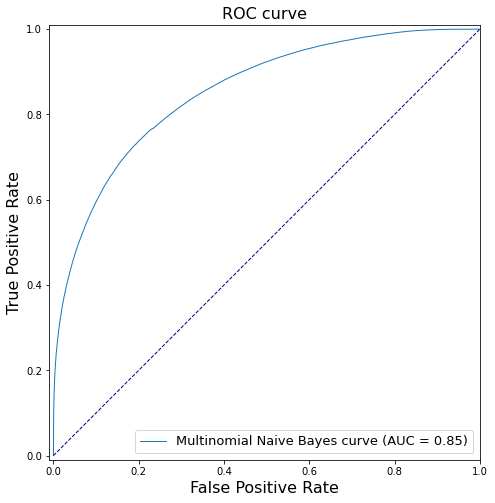

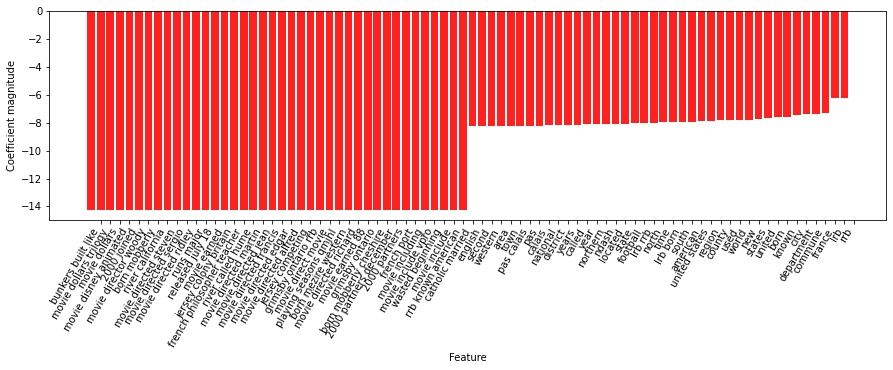

In [27]:
score = 'accuracy'

print("Tuning hyper-parameters for %s" % score)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
mnb_grid = GridSearchCV(MultinomialNB(), param_grid, cv=5,scoring=score) 
tic = time()
mnb_grid.fit(X_train, y_train)
toc = time()
mnbtime=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(mnb_grid.best_params_)
print("Grid scores on training data:\n")
means = mnb_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylim([0,1.1])
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,mnb_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)

y_score = mnb_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' MultinomialNB 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Multinomial Naive Bayes',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
# predictions=mnb_grid.best_estimator_.predict(X_test_minmax)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/MultinomialNB_text_features_only_tfid_vectoriser",index=False)

y_score = mnb_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' MultinomialNB 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Multinomial Naive Bayes',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


mglearn.tools.visualize_coefficients(mnb_grid.best_estimator_.coef_,feature_names, n_top_features=40)


